In [55]:
# obtain the data
#!pip install -U pandas
import pandas as pd
data = pd.read_csv('testset_C.csv', sep=';')
data.head()

,id,productgroup,main_text,add_text,manufacturer
0,26229701,WASHINGMACHINES,WAQ284E25,WASCHMASCHINEN,BOSCH
1,16576864,USB MEMORY,LEEF IBRIDGE MOBILE SPEICHERERWEITERUNG FUER I...,PC__1100COMPUTINGMEMORY__1110MEMORYCARDS,LEEF
2,26155618,USB MEMORY,SANDISK 32GB ULTRA FIT USB 3.0,W1370,NaN
3,25646138,BICYCLES,HOLLANDRAD DAMEN 28 ZOLL TUSSAUD 3-GAENGE RH 5...,FAHRRAEDER // SPORTFAHRRAEDER,SCHALOW & KROH GMBH
4,19764614,BICYCLES,DAHON SPEED D7 SCHWARZ ? FALTRAD,SPORTS__30000WHEELED__30070BIKES,DAHON


In [61]:
main_text_list = [repr(tt) for tt in data['main_text'].tolist()]
add_text_list = [repr(tt) for tt in data['add_text'].tolist()]
mnf_list = [repr(tt) for tt in data['manufacturer'].tolist()]
categories_list = data['productgroup'].tolist()

## Application 1: Word Cloud for Each Category
For each category, we plot its corresponding main_text word cloud.

In [98]:
#!pip install -U wordcloud
#!pip install stop_words
#!pip install matplotlib
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

Requirement already up-to-date: wordcloud in /Users/yg211/PycharmProjects/ScratchPad/venv_nlp/lib/python3.6/site-packages
Requirement already up-to-date: pillow in /Users/yg211/PycharmProjects/ScratchPad/venv_nlp/lib/python3.6/site-packages (from wordcloud)
  Using cached https://files.pythonhosted.org/packages/82/63/eee643cc97f2bd22da87420f28fb6cd4b940c25f6eff6c4d2ca2e24a7022/numpy-1.18.1-cp36-cp36m-macosx_10_9_x86_64.whl
    85% |███████████████████████████▌    | 11.3MB 308kB/s eta 0:00:07  5% |█▉                              | 747kB 484kB/s eta 0:00:26    41% |█████████████▍                  | 5.5MB 194kB/s eta 0:00:40    75% |████████████████████████▏       | 9.9MB 336kB/s eta 0:00:10^C

Operation cancelled by user
You are using pip version 9.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [27]:
def draw(word_string, stop_words):
    wordcloud = WordCloud(background_color="white",
                              width=2400, height=2000,
                              stopwords=stop_words
                             ).generate(word_string)
    plt.imshow(wordcloud)
    plt.axis("off") 
    plt.margins(x=0, y=0)



In [28]:
from stop_words import get_stop_words 
stop_words = get_stop_words('german') 

additional_ge_stopwords = ['erst', 'wurden', 'wurde', 'nachdem', 'potenziellen']
for word in additional_ge_stopwords:
    stop_words.append(word)


In [29]:
print('all categories', set(categories_list))

all categories {'BICYCLES', 'CONTACT LENSES', 'WASHINGMACHINES', 'USB MEMORY'}


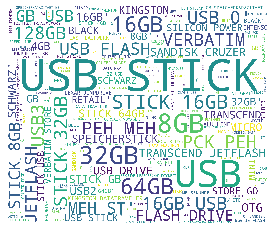

In [30]:
wanted_ctgy = 'USB MEMORY' # specify your wanted category here
wanted_idx = [i for i in range(len(categories_list)) if categories_list[i]==wanted_ctgy]
wanted_text = ' '.join([main_text_list[i] for i in wanted_idx])
draw(wanted_text, stop_words)

## Application 2: Analyse The Comments for Each Manufacturer

In [63]:
#!pip install -U nltk
from nltk import FreqDist
manufacture_list = data['manufacturer'].tolist()
unique_mnf = list(set(manufacture_list))
print('num of unique manufacturers', len(unique_mnf))

mnf_fd = FreqDist(manufacture_list)
mnf_fd.most_common()

num of unique manufacturers 624


[(nan, 1344),
 ('COOPER', 343),
 ('CIBA', 243),
 ('SIEMENS', 205),
 ('MIELE', 197),
 ('B&L', 181),
 ('SANDISK', 176),
 ('J&J', 175),
 ('BOSCH', 173),
 ('ALCON', 172),
 ('TRANSCEND', 161),
 ('AEG', 149),
 ('VERBATIM', 140),
 ('CUBE', 126),
 ('KINGSTON', 125),
 ('INTENSO', 103),
 ('VESTEL GERMANY GMBH', 86),
 ('BERGAMONT', 80),
 ('SAMSUNG', 75),
 ('BAUKNECHT', 74),
 ('BEKO', 72),
 ('SERIOUS', 71),
 ('MPG&E', 68),
 ('GHOST', 66),
 ('MERIDA', 63),
 ('SILICON POWER', 61),
 ('KS CYCLING', 59),
 ('HAMA', 54),
 ('ACUVUE', 52),
 ('EMTEC', 52),
 ('TOSHIBA', 52),
 ('WINORA', 52),
 ('CORSAIR', 51),
 ('BICYCLES', 48),
 ('FUJI', 48),
 ('BOCAS', 43),
 ('CONSTRUCTA', 42),
 ('LEXAR', 42),
 ('JOHNSON & JOHNSON', 39),
 ('ORTLER', 38),
 ('OTTO GMBH & CO. KG', 38),
 ('GOODRAM', 36),
 ('SCHALOW & KROH GMBH', 35),
 ('GORENJE', 35),
 ('PUKY', 35),
 ('SONY', 34),
 ('GAZELLE', 33),
 ('RALEIGH', 33),
 ("S'COOL", 33),
 ('COOPER VISION', 32),
 ('BEKO DEUTSCHLAND GMBH', 32),
 ('XLYNE', 32),
 ('FIXIE INC.', 30),
 ('

In [70]:
# now we maintain a manufacturer-tokens matrix, and see the most commonly used word for each manufacturer
from nltk import ConditionalFreqDist
mnf_tokens_matrix = ConditionalFreqDist(
    (manufacture_list[idx], word) for idx in list(range(8000)) 
    for word in [ww for ww in main_text_list[idx].split() if ww.lower() not in stop_words]
)
mnf_tokens_matrix['AEG'].most_common()

[("'LAVAMAT", 66),
 ('/', 35),
 ('LAVAMAT', 32),
 ("'AEG", 30),
 ('-', 22),
 ('KG', 19),
 ('A+++', 17),
 ("'L", 16),
 ('FL', 16),
 ('L', 15),
 ('AEG', 13),
 ('WASCHMASCHINE', 11),
 ('WEISS', 11),
 ('WAM', 11),
 ('KG,', 11),
 ('WASCHMASCHINE,', 11),
 ('7', 10),
 ("'", 9),
 ("WEISS'", 9),
 ('6', 8),
 ("'HGG", 8),
 ('8', 8),
 ("A+++'", 8),
 ('1400', 7),
 ('JAHRE', 7),
 ('SCHLEUDERDREHZAHL', 6),
 ('U/MIN:', 6),
 ('MAXIMAL', 6),
 ('STARTZEITVORWAHL,', 6),
 ('3', 6),
 ('WFL', 5),
 ('9', 5),
 ("GARANTIE'", 5),
 ("PACKGR:1.00'", 5),
 ('TL', 5),
 ('WASCHTROCKNER', 5),
 ('WVFL', 5),
 ('LEISTUNGSEIGENSCHAFTEN', 4),
 ('ANSCHLUSSWERT:', 4),
 ('KW', 4),
 ('UPM', 4),
 ('FUELLMENGE', 4),
 ('PROTEX', 4),
 ('INTEGRIERTE', 4),
 ('FLUESSIGWASCHMITTELEINSPUELUNG,', 4),
 ('PROGRAMME', 4),
 ('OPTIONEN:', 4),
 ('LEICHT', 4),
 ('BUEGELN,', 4),
 ('61470', 4),
 ('FUELLMENGE,', 4),
 ('1.400,', 4),
 ('LCD-DISPLAY,', 4),
 ('RESTZEITANZEIGE,', 4),
 ('VFL', 4),
 ('TURBO', 4),
 ('KWH', 4),
 ('WASCHAUTOMAT', 4),
 ("'0"

In [97]:
# now we can compare words appeared in two different manufacturers
def compare_brand(brand1, brand2, matrix):
    assert brand1 in unique_mnf
    assert brand2 in unique_mnf
    print('\n===============Word Frequency for Different Brands===============')
    words1 = [w for (w,t) in matrix[brand1].most_common()]
    words2 = [w for (w,t) in matrix[brand2].most_common()]
    shared_words = set(words1).intersection(set(words2))
    print('{:45}{:20}{:20}{:20}'.format('',brand1,brand2,'delta'))
    for ww in shared_words:
        print('{:30}{:20}{:20}{:20}'.format(ww,matrix[brand1][ww],matrix[brand2][ww],matrix[brand1][ww]-matrix[brand2][ww]))
    print('\n==============================')
    print('Words appeared in {} but not in {} (word and frequency):'.format(brand1,brand2))
    diff_words = set(words1).difference(set(words2))
    common_words = [(w,t) for (w,t) in matrix[brand1].most_common() if w in diff_words]
    print(common_words[:10])
    print('\n==============================')
    print('Words appeared in {} but not in {} (word and frequency):'.format(brand2,brand1))
    diff_words = set(words2).difference(set(words1))
    common_words = [(w,t) for (w,t) in matrix[brand2].most_common() if w in diff_words]
    print(common_words[:10])
    
    
compare_brand('SIEMENS','MIELE',mnf_tokens_matrix)


===============Word Frequency for Different Brands===============
                                             SIEMENS             MIELE               delta               
WASCHAUTOMAT                                     1                   3                  -2
8KG'                                             1                   1                   0
W                                               13                   3                  10
WASCHMASCHINE'                                   5                   4                   1
FL                                               6                   5                   1
6                                                8                   5                   3
8KG,                                             1                   2                  -1
'0                                               1                   4                  -3
FUELLMENGE,                                     10                   8                   2
SCHLEUDE